In [11]:

import numpy as np
from cvlib.object_detection import ObjectDetection
from cvlib.tracker import EuclideanDistTracker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import time
import cv2
sns.set_style("whitegrid")
%matplotlib inline

In [12]:
video_name = 'camera2'
video_capture = cv2.VideoCapture(f"./Videos/{video_name}.mp4")

In [13]:
width = 848
height = 477
dim = (width, height)
def image_resize(img, dim):
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

car_cascade = cv2.CascadeClassifier('./cascade/cars.xml')
detector = ObjectDetection()

Dectector model is loading...
Dectector model is ready now


In [14]:
max_of_frame = 50
start_frame = 150

In [23]:
n_of_frame = 0
video_capture.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
tic = time.time()
car_cascade_time = []
frame_take = []
while True:
    ret, frame = video_capture.read()
    if ret:

        #frame = image_resize(frame, dim)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cars = car_cascade.detectMultiScale(gray, 1.1, 1)
        toc = time.time()
        if n_of_frame > 0:
            car_cascade_time.append(car_cascade_time[-1] + (toc-tic)*1000)
        else:
            car_cascade_time.append((toc-tic)*1000)
        for (x,y,w,h) in cars:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2) 
        frame_take.append(frame)
        tic = time.time()
        n_of_frame += 1
        video_capture.set(cv2.CAP_PROP_POS_FRAMES, start_frame + n_of_frame*30)
        
        # if render:
        #     video_results.write(frame)
        # cv2.imshow("frame", frame)
    else:
        break;
    if n_of_frame == max_of_frame:
        break;


In [24]:
n_of_frame = 0
video_capture.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
tic = time.time()
yolo_time = []
yolo_frame_take = []
while True:
    ret, frame = video_capture.read()
    if ret:

        #frame = image_resize(frame, dim)
        cars, _ = detector.predict(frame,specific_class=[0], threshold=0, plot=False)

        toc = time.time()
        if n_of_frame > 0:
            yolo_time.append(yolo_time[-1] + (toc-tic)*1000)
        else:
            yolo_time.append((toc-tic)*1000)
        for (x,y,xx,yy) in cars:
            cv2.rectangle(frame,(x,y),(xx,yy),(0,0,255),2) 
        yolo_frame_take.append(frame)
        tic = time.time()
        n_of_frame += 1
        video_capture.set(cv2.CAP_PROP_POS_FRAMES, start_frame + n_of_frame*30)
        # if render:
        #     video_results.write(frame)
        # cv2.imshow("frame", frame)
    else:
        break;
    if n_of_frame == max_of_frame:
        break;

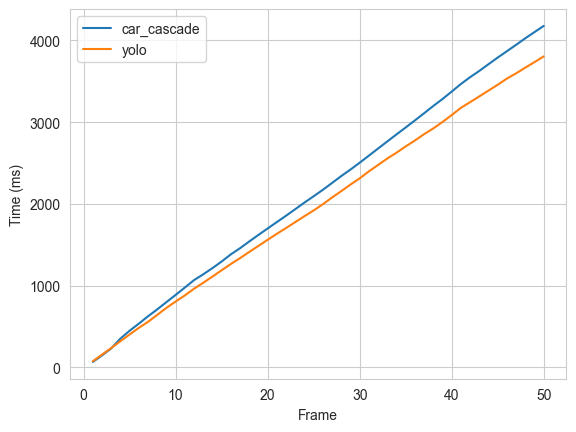

In [25]:
plt.plot(range(1,max_of_frame+1), car_cascade_time, label="car_cascade")
plt.plot(range(1,max_of_frame+1), yolo_time, label="yolo")
plt.xlabel("Frame")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

In [18]:
def plot_list_Frame(frame_list1, frame_list2 = None, title1= "car_cascade", title2="yolo"):
    sns.set_style("white")
    plt.figure(figsize=(20, 7 if frame_list2 != None else 5))
    w_plot = min(len(frame_list1),len(frame_list2) if frame_list2 != None else len(frame_list1))
    map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), frame_list1)
    if frame_list2 != None:
        map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), frame_list2)
    n_row = 2 if frame_list2 != None else 1
    for i in range(w_plot):
        plt.subplot(n_row, w_plot, i+1)
        plt.imshow(frame_list1[i])
        plt.title(title1)
        if frame_list2 != None:
            plt.subplot(n_row, w_plot, i+1+w_plot)
            plt.imshow(frame_list2[i])
            plt.title(title2)
    plt.show()
    sns.set_style("whitegrid")

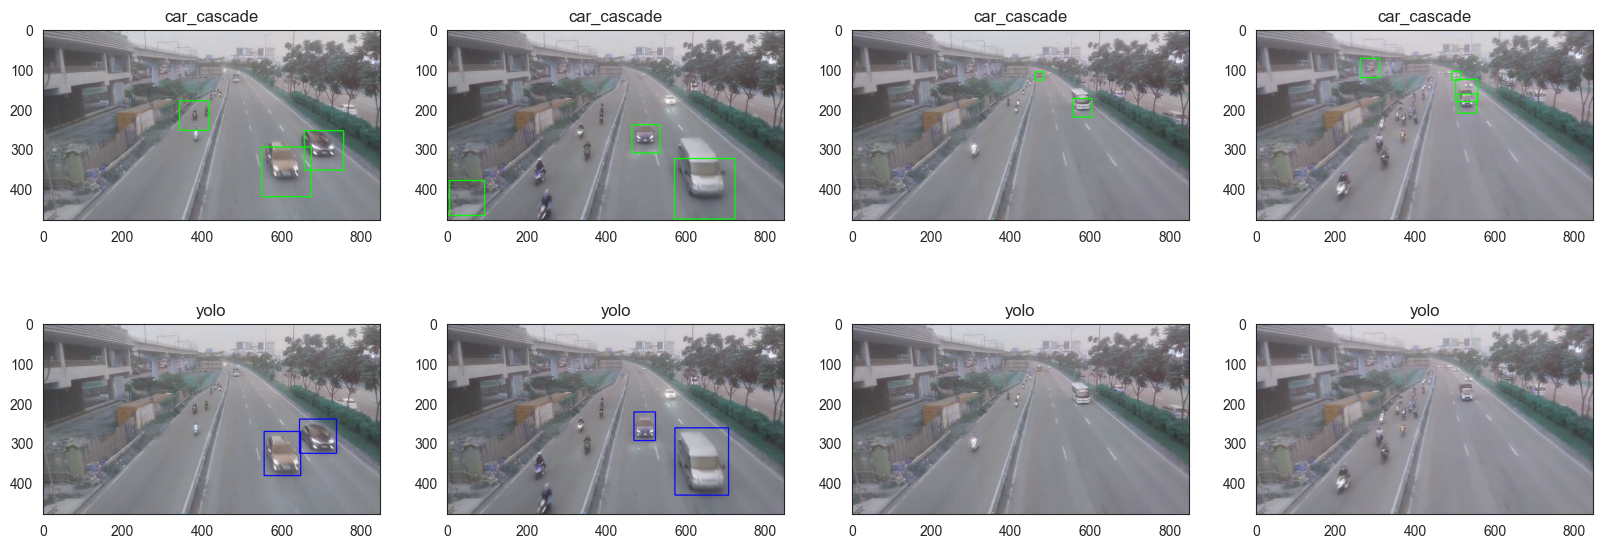

In [19]:
plot_list_Frame(frame_take[::15], yolo_frame_take[::15])

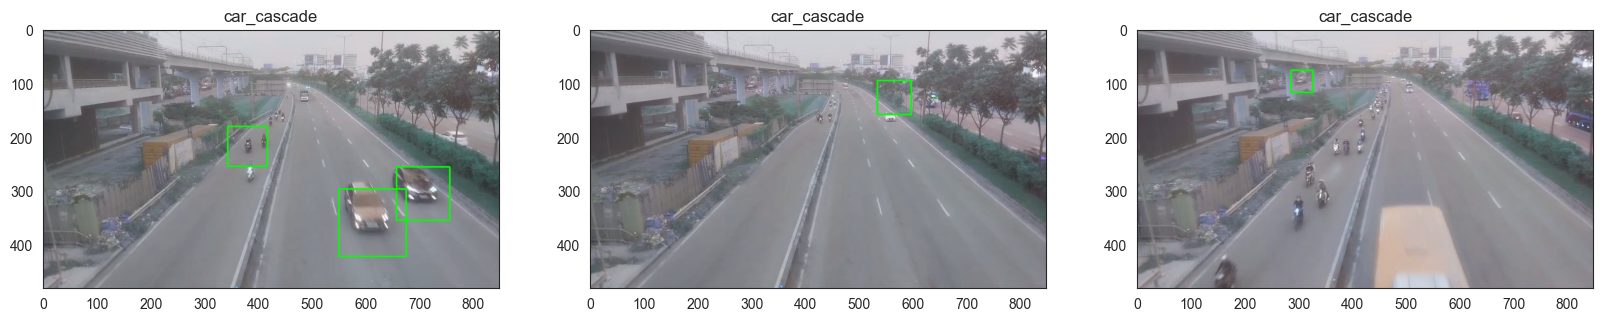

In [22]:
plot_list_Frame(frame_take[::20])